# Skygeni Assignment
## Name : Tejaswi G
## Registration Number : 12100200

* Link for the raw dataset : https://drive.google.com/file/d/1wYCddGhiciYpjluXApU_lAZzkVMt9vh-/view?usp=drive_link

# Objectives Given to be solved with the provided dataset

#### Questions:
* 1.	Which hour has the highest frequency of candidates scheduled to take up exams? Show the plot diagram of the frequencies.
* 2.	Create stacked bar graph of the number of candidates taken exam both at day and night (Day being 06:00 AM to 09:00 PM)
* 3.	Identify the number of candidates scheduled to write exam in different age groups, with age group labels "0-17", "18-25", "26-34", "35-44", "45-54", "55-64", and "65+" as the index and the frequency of candidates scheduled as the values.


## Data Preprocessing
### Data Cleaning 
### Data Transformation
### Data Reduction

* Link for the cleaned Dataset : https://drive.google.com/file/d/1XFxnBsSuM0D4lfsRk0dKpooeJQg8L4bV/view?usp=sharing

### Importing the required python libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### Importing Dataset

In [2]:
df = pd.read_csv("GRE_Reg_Data.csv")

### Displaying the imported Dataset

In [3]:
print(df)

        REGISTRATION_NO Date Registered DATE OF EXAM OCC  TIME OCC  Age Sex
0             220314085         22-7-22          12-5-20      1110   27   F
1             222013040          6-8-22           4-6-20      1620   60   M
2             220614831         18-8-22          17-8-20      1200   28   M
3             231207725         27-2-23          27-1-20       635   37   M
4             220213256         14-7-22          14-7-20       900   79   M
...                 ...             ...              ...       ...  ...  ..
215735        231510379         29-5-23          25-5-23      1100   25   M
215736        231604807         27-1-23          26-1-23      1800   23   M
215737        231606525         22-3-23          22-3-23      1000   25   F
215738        231210064         12-4-23          12-4-23      1630   29   M
215739        230906458          5-3-23           5-3-23       900   53   F

[215740 rows x 6 columns]


#### Which hour has the highest frequency of candidates scheduled to take up exams? Show the plot diagram of the frequencies.
###### ______________________________________________________________________________________________________________

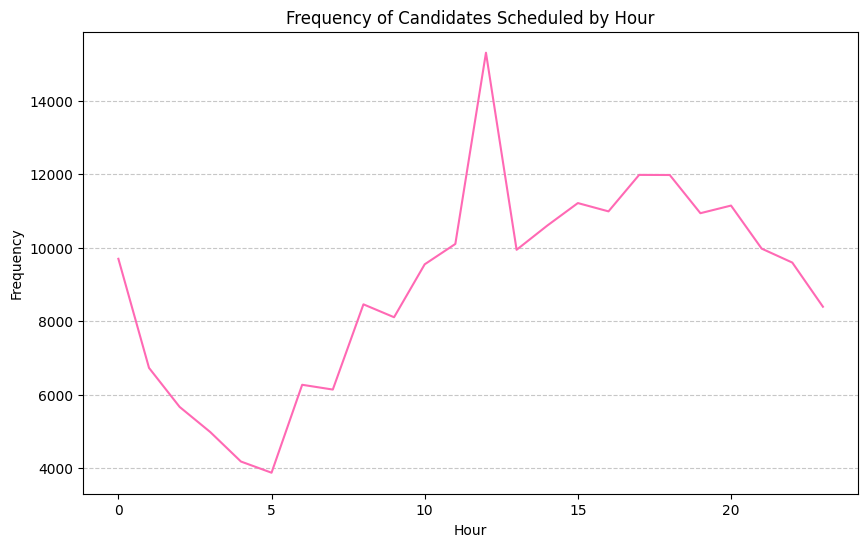

The hour with the highest frequency of candidates scheduled is 12:00 with 15305 candidates.


In [4]:
df['Hour'] = df['TIME OCC'] // 100 # Extracting the hour from the hour and minute format [by dividing by 100]

hour_freq = df['Hour'].value_counts().sort_index() # Calculating the frequency of each hour in the 'Hour' column

max_hour = hour_freq.idxmax() # finding the hour with highest frequency

max_frequency = hour_freq[max_hour] # finding the number of students with highest frequency (additionally added)

## Plotting the frequencies in line graph
#___________________________
# size of plot
plt.figure(figsize=(10, 6)) 
# type of graph to plot and it's color
hour_freq.plot(kind='line', color='hotpink')
#title
plt.title('Frequency of Candidates Scheduled by Hour')
# x - axis label
plt.xlabel('Hour') 
# y - axis label
plt.ylabel('Frequency') 
# x - axis of the plot are displayed horizontally
plt.xticks(rotation=0) 
# customizing the grid lines (type of gridlines, transperancy)
plt.grid(axis='y', linestyle='--', alpha=0.7)
# display the plot
plt.show() 


print(f"The hour with the highest frequency of candidates scheduled is {max_hour}:00 with {max_frequency} candidates.")
# Output Line displayed at the bottom

### Create stacked bar graph of the number of candidates taken exam both at day and night (Day being 06:00 AM to 09:00 PM)
###### ___________________________________________________________________________________________________________________________

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


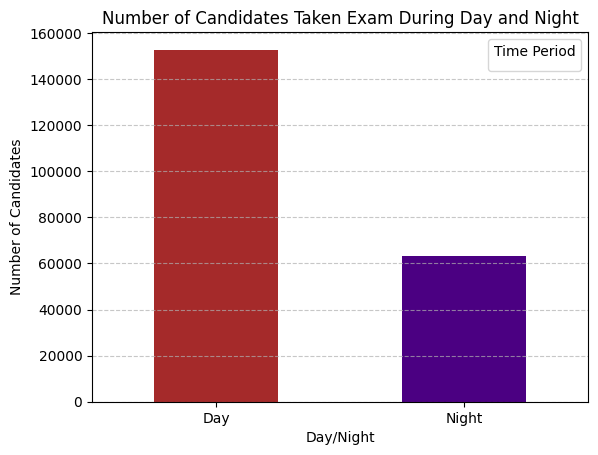

In [5]:
# Define a function to categorize time : 
# Day : 6am to 9pm
# Night : the rest of the day!
def categorize_time(hour):
    if 6 <= hour < 21:
        return 'Day'
    else:
        return 'Night'

# Extracting the hour from the hour and minute format
df['Hour'] = df['TIME OCC'] // 100 

# Adding the new column to the dataframe based on whether each exam timing falls within the daytime or nighttime hours
df['Day_Night'] = df['Hour'].apply(categorize_time)

# Getting the number of candidates scheduled for exams during the day and during the night
day_night_count = df.groupby('Day_Night').size() 


# Plotting the number of Candidates taking exam during day and night in bar graph
#___________________________
# type of graph to plot and it's color
day_night_count.plot(kind='bar',color=['brown', 'indigo'])
# title
plt.title('Number of Candidates Taken Exam During Day and Night')
# x - axis
plt.xlabel('Day/Night')
#y - axis
plt.ylabel('Number of Candidates')
# x - axis of the plot are displayed horizontally
plt.xticks(rotation=0)
# mentioning the info about measure used in plotting day and night difference
plt.legend(title='Time Period', loc='upper right')
# customizing the grid lines (type of gridlines, transperancy)
plt.grid(axis='y', linestyle='--', alpha=0.7)
# display the plot
plt.show()


### Identify the number of candidates scheduled to write exam in different age groups, with age group labels "0-17", "18-25", "26-34", "35-44", "45-54", "55-64", and "65+" as the index and the frequency of candidates scheduled as the values.
###### ___________________________________________________________________________________________________________________________

In [6]:
# Define the age group labels and corresponding age ranges
age_groups = {
    "0-17": (0, 17),
    "18-25": (18, 25),
    "26-34": (26, 34),
    "35-44": (35, 44),
    "45-54": (45, 54),
    "55-64": (55, 64),
    "65+": (65, float('inf')) # special floating-point value representing positive infinity
}

# Function to categorize age into age groups
def categorize_age(age):
    for group, (lower, upper) in age_groups.items(): # iterates over each key-value pair consisting - [age group and age range]
        if lower <= age <= upper: # if condition to define the range
            return group # return the group of age in which age range it falls
    return "Unknown" # return "Unknown" when age matches none of the groups

# Adding the new column to the dataframe by grouping ages in Age_Group
df['Age_Group'] = df['Age'].apply(categorize_age)

# Getting the number of students in each age group
age_group_counts = df['Age_Group'].value_counts().sort_index()

# Reindex
##_______
# changing to specified index
# count taken as 0 when there is no student in that range
age_group_counts = age_group_counts.reindex(age_groups.keys(), fill_value=0)

#  displaying the Age Range with the number of candidates
print("Number of candidates scheduled to write exam in different age groups : ")
# Enter the index and values into dataframe for better representation
age_counts_df = pd.DataFrame({'Age_Range' : age_group_counts.index, 'Number_of_Candidates' : age_group_counts.values})
#display the output
print(age_counts_df)

Number of candidates scheduled to write exam in different age groups : 
  Age_Range  Number_of_Candidates
0      0-17                 34531
1     18-25                 28283
2     26-34                 47470
3     35-44                 42155
4     45-54                 28353
5     55-64                 20169
6       65+                 14746
